<a href="https://colab.research.google.com/github/akshatshahd/Machine-Learning/blob/main/ML_LAB_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("iris.csv")

# Extract features and target
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = data['species'].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Data ready:", X_scaled.shape)
print("Classes:", encoder.classes_)


Data ready: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA to reduce from 4D → 2D
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y_encoded)

print("Explained variance ratio:", lda.explained_variance_ratio_)


Explained variance ratio: [0.99147248 0.00852752]


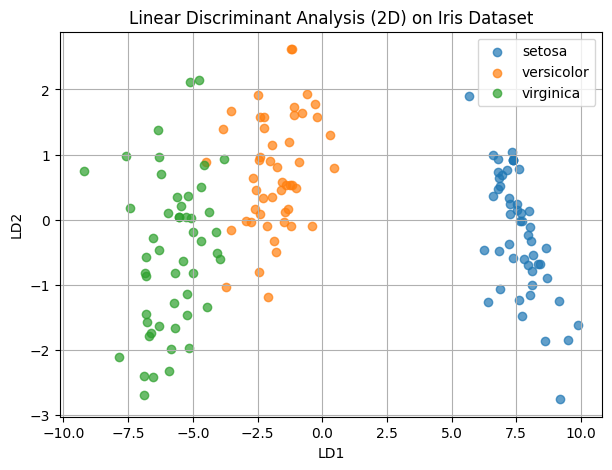

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
for label in range(3):
    plt.scatter(X_lda[y_encoded==label, 0],
                X_lda[y_encoded==label, 1],
                label=encoder.classes_[label],
                alpha=0.7)
plt.title("Linear Discriminant Analysis (2D) on Iris Dataset")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)
plt.show()


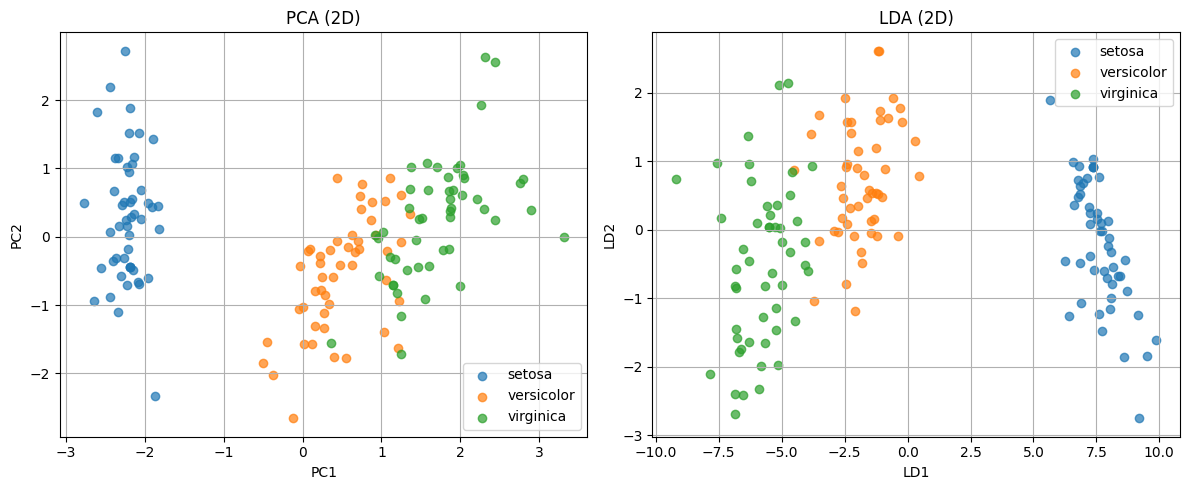

In [ ]:
from sklearn.decomposition import PCA

# PCA for comparison
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

# PCA plot
plt.subplot(1,2,1)
for label in range(3):
    plt.scatter(X_pca[y_encoded==label,0],
                X_pca[y_encoded==label,1],
                label=encoder.classes_[label], alpha=0.7)
plt.title("PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)

# LDA plot
plt.subplot(1,2,2)
for label in range(3):
    plt.scatter(X_lda[y_encoded==label,0],
                X_lda[y_encoded==label,1],
                label=encoder.classes_[label], alpha=0.7)
plt.title("LDA (2D)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
